# Imprting Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Cleaning and Transformation

In [5]:
df = pd.read_csv("UdemyCoursesDataset.csv")

In [6]:
df

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


### Converting Data Types

In [9]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')  
df['price'] = df['price'].fillna(0).astype('int64')           
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   int64              
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 291.4+ KB


In [10]:
df['Year'] = pd.to_datetime(df['published_timestamp']).dt.year

In [11]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,Year
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,66.010320,3194.230310,156.093156,40.065182,2015.432917
std,3.436355e+05,60.984167,9499.378361,934.957204,50.373299,1.185800
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,4.078430e+05,20.000000,110.250000,4.000000,15.000000,2015.000000
50%,6.885580e+05,45.000000,911.500000,18.000000,25.000000,2016.000000
75%,9.617515e+05,95.000000,2540.250000,67.000000,45.000000,2016.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,2017.000000


In [12]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
Year                   0
dtype: int64

In [13]:
df.duplicated().sum()

6

In [14]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [15]:
df.drop(df[df['num_lectures'] == 0].index, inplace=True) # remove rows with lectures = 0

In [16]:
df.drop(columns = ['course_id'] , inplace = True)

In [17]:
df.shape

(3671, 11)

# EDA and Visualizations

#### Heat Map 

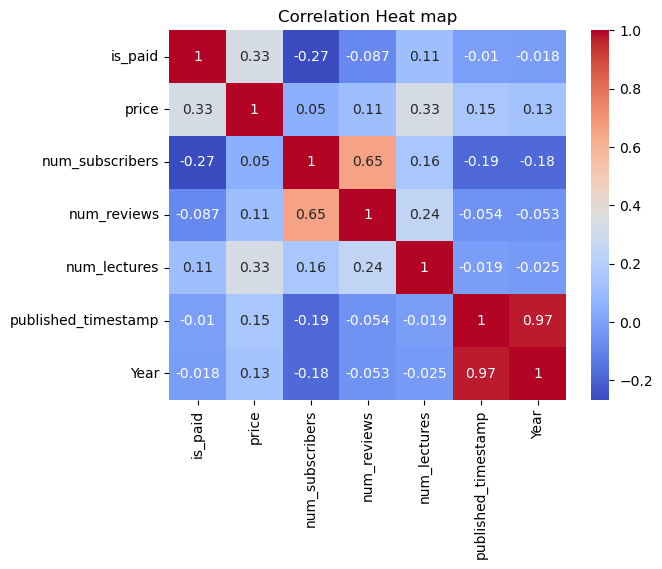

In [20]:
numeric_cols = df.select_dtypes(exclude = np.object_)

sns.heatmap(numeric_cols.corr(), annot = True,cmap="coolwarm")
plt.title("Correlation Heat map")
plt.show()

#### Paid vs Free Courses

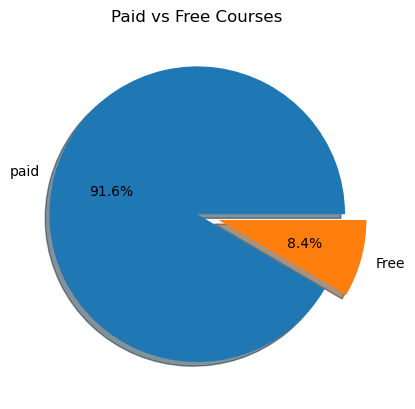

In [35]:
plt.pie(df['is_paid'].value_counts(), labels = ("paid","Free"), autopct='%1.1f%%', shadow = True , explode = [0,.15])
plt.title("Paid vs Free Courses")
plt.show()

#### Relation betwen Subscribers number and Courses Payment

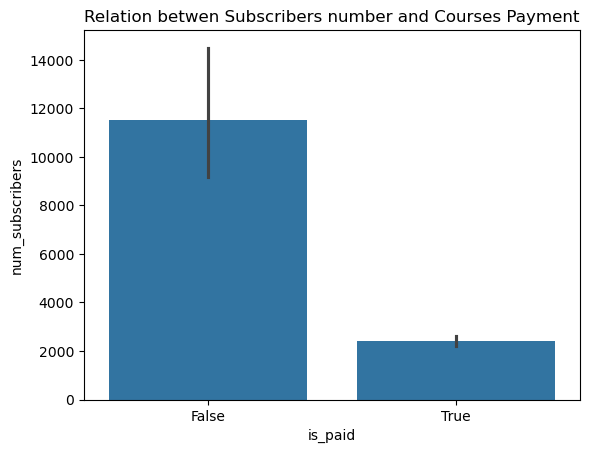

In [39]:
sns.barplot(x = 'is_paid' , y = 'num_subscribers', data = df)
plt.title("Relation betwen Subscribers number and Courses Payment")
plt.show()

#### Courses by Subject 

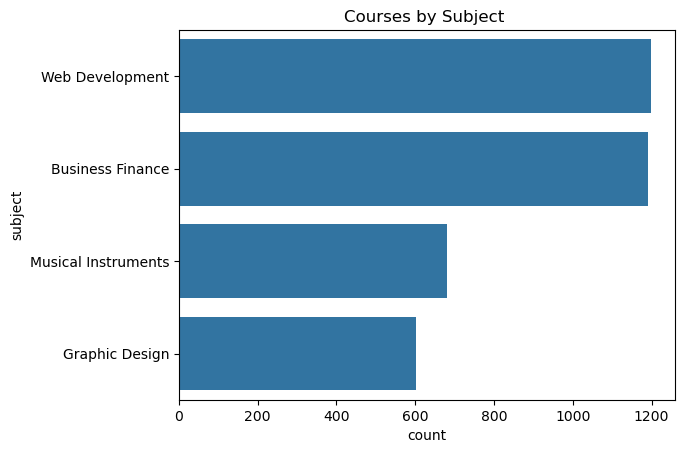

In [42]:
sns.countplot(df['subject'], order = df.subject.value_counts().index)
plt.title("Courses by Subject ")
plt.show()

#### Subject Percentage

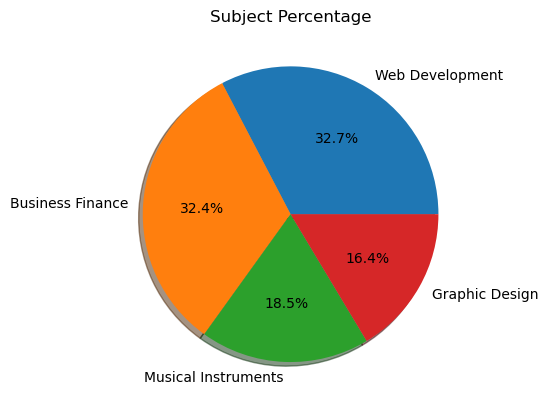

In [45]:
plt.pie(df['subject'].value_counts(),labels=df['subject'].value_counts().index,  autopct='%1.1f%%', shadow = True )
plt.title("Subject Percentage")
plt.show()

#### Subscribers number by Subject

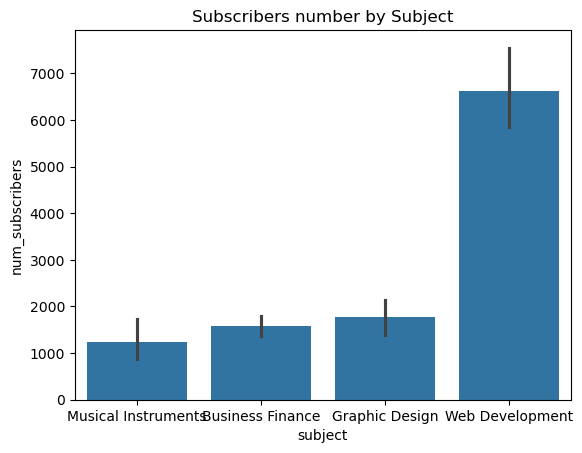

In [48]:
sns.barplot(x = 'subject' , y = 'num_subscribers', data = df)
plt.title("Subscribers number by Subject")
plt.show()

#### Subscribers number by Subject and Payment

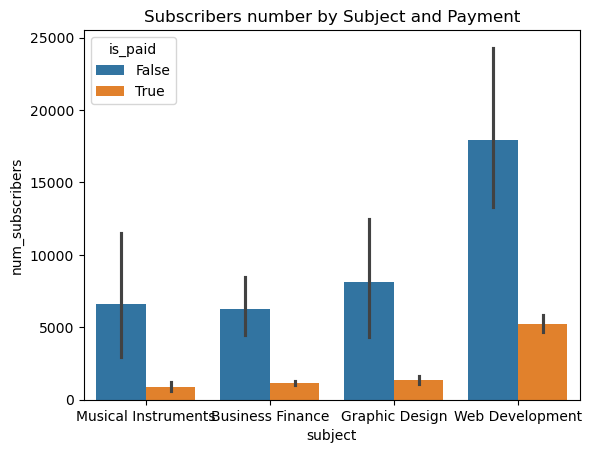

In [51]:
sns.barplot(x = 'subject' , y = 'num_subscribers', hue = 'is_paid', data = df)
plt.title("Subscribers number by Subject and Payment")
plt.show()

#### Courses by Level

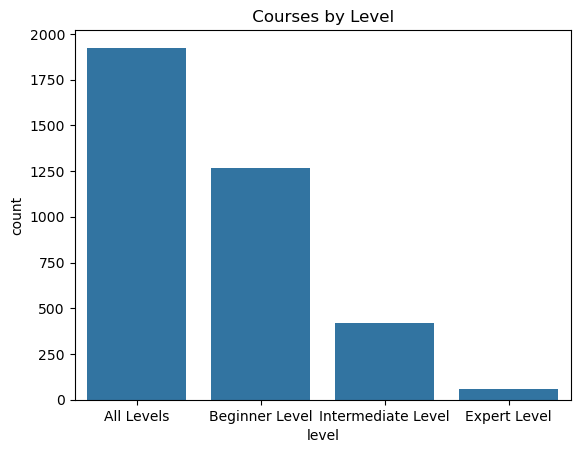

In [53]:
sns.countplot(x = 'level', data = df, order = df.level.value_counts().index)
plt.title(" Courses by Level ")
plt.show()

#### Distribution of Courses Prices

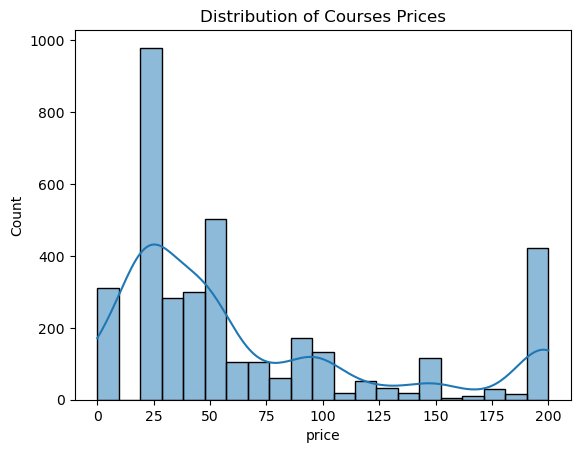

In [56]:
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Courses Prices")
plt.show()

#### Relation between Price and Subscribers number

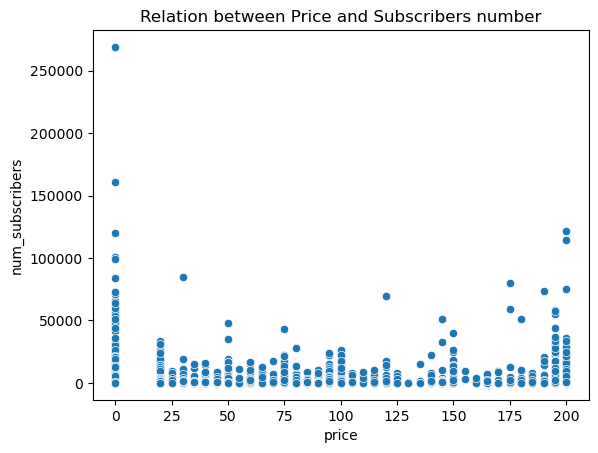

In [59]:
sns.scatterplot(x = 'price', y = 'num_subscribers', data = df)
plt.title("Relation between Price and Subscribers number")
plt.show()

#### Relation between lectures number and Subscribers number

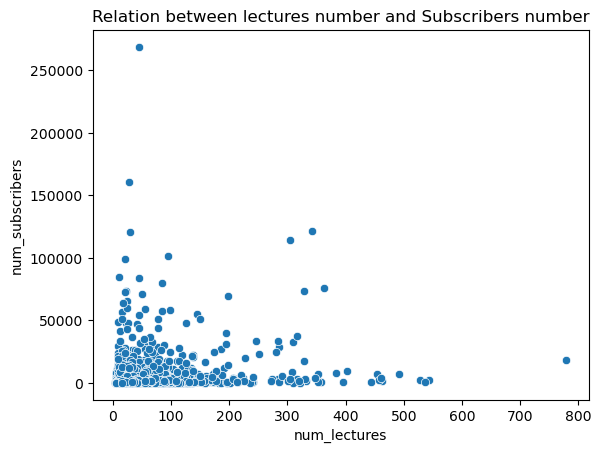

In [62]:
sns.scatterplot(x = 'num_lectures', y = 'num_subscribers', data = df)
plt.title("Relation between lectures number and Subscribers number")
plt.show()

#### Courses prices by Year

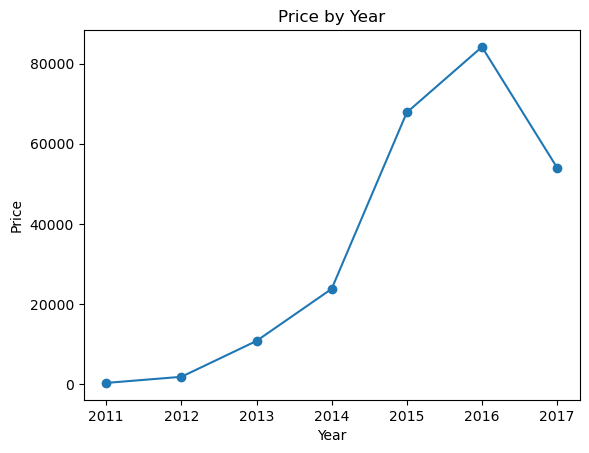

In [65]:
plt.plot(df.groupby('Year')['price'].sum(), marker='o')
plt.title('Price by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#### Top 5 Courses have Subscribers

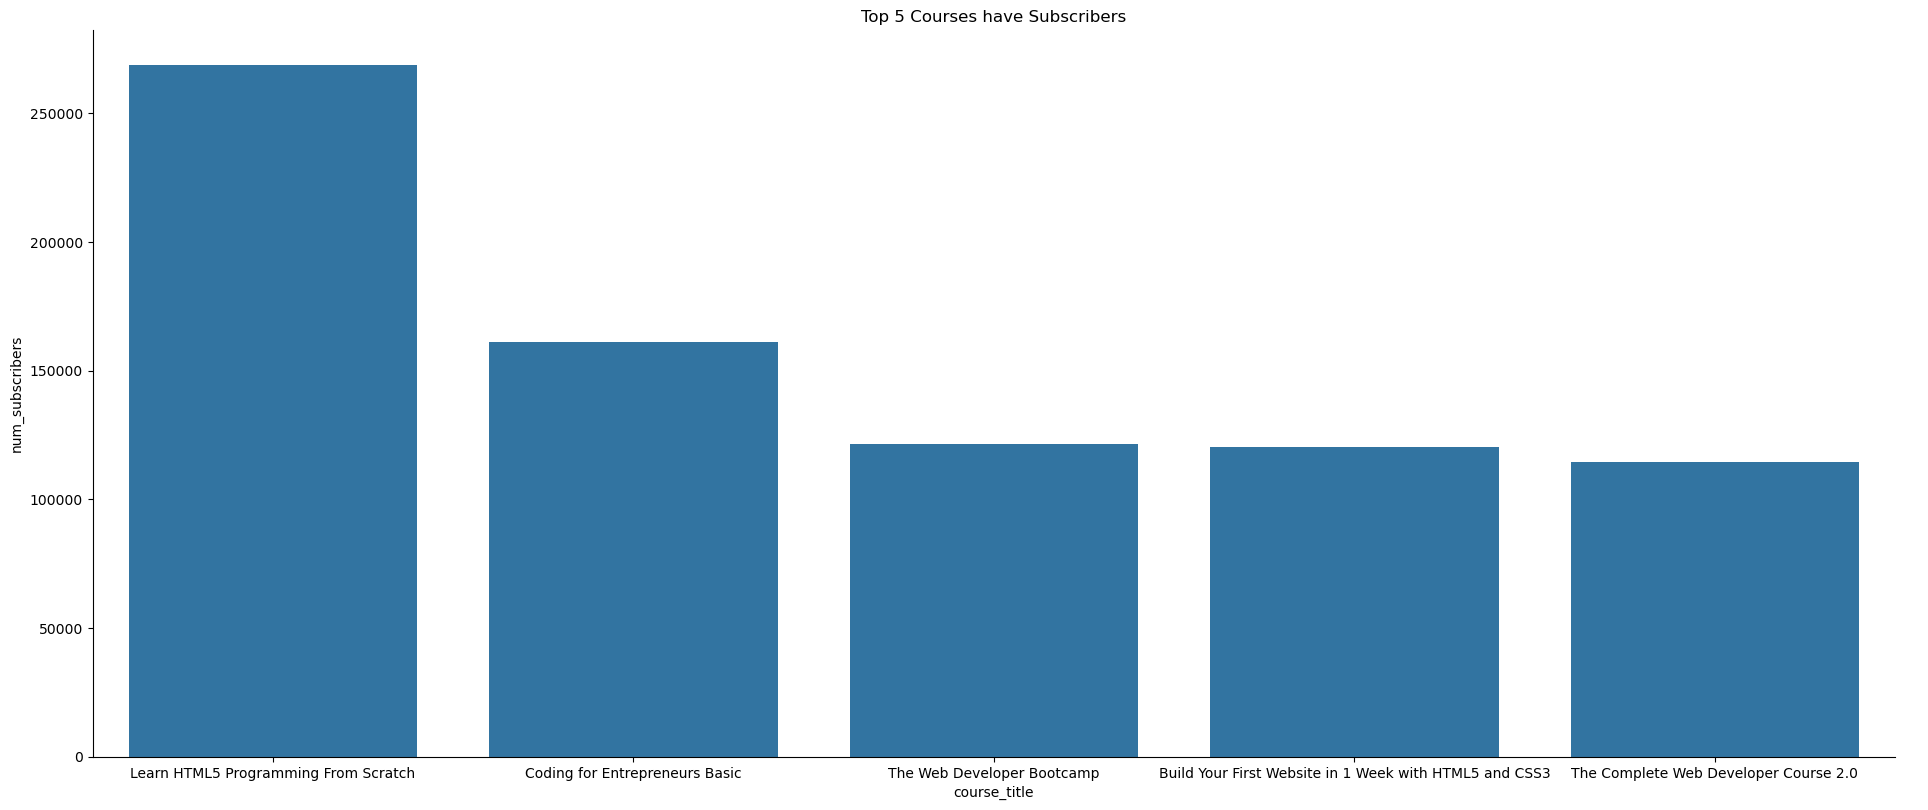

In [80]:
top_courses = df.sort_values(by='num_subscribers', ascending=False).head(5)
sns.catplot(data = top_courses, kind = 'bar', x='course_title', y='num_subscribers', aspect =2.4 , height = 8)
plt.title("Top 5 Courses have Subscribers")
plt.show()

#### Top 5 Courses have Reviews

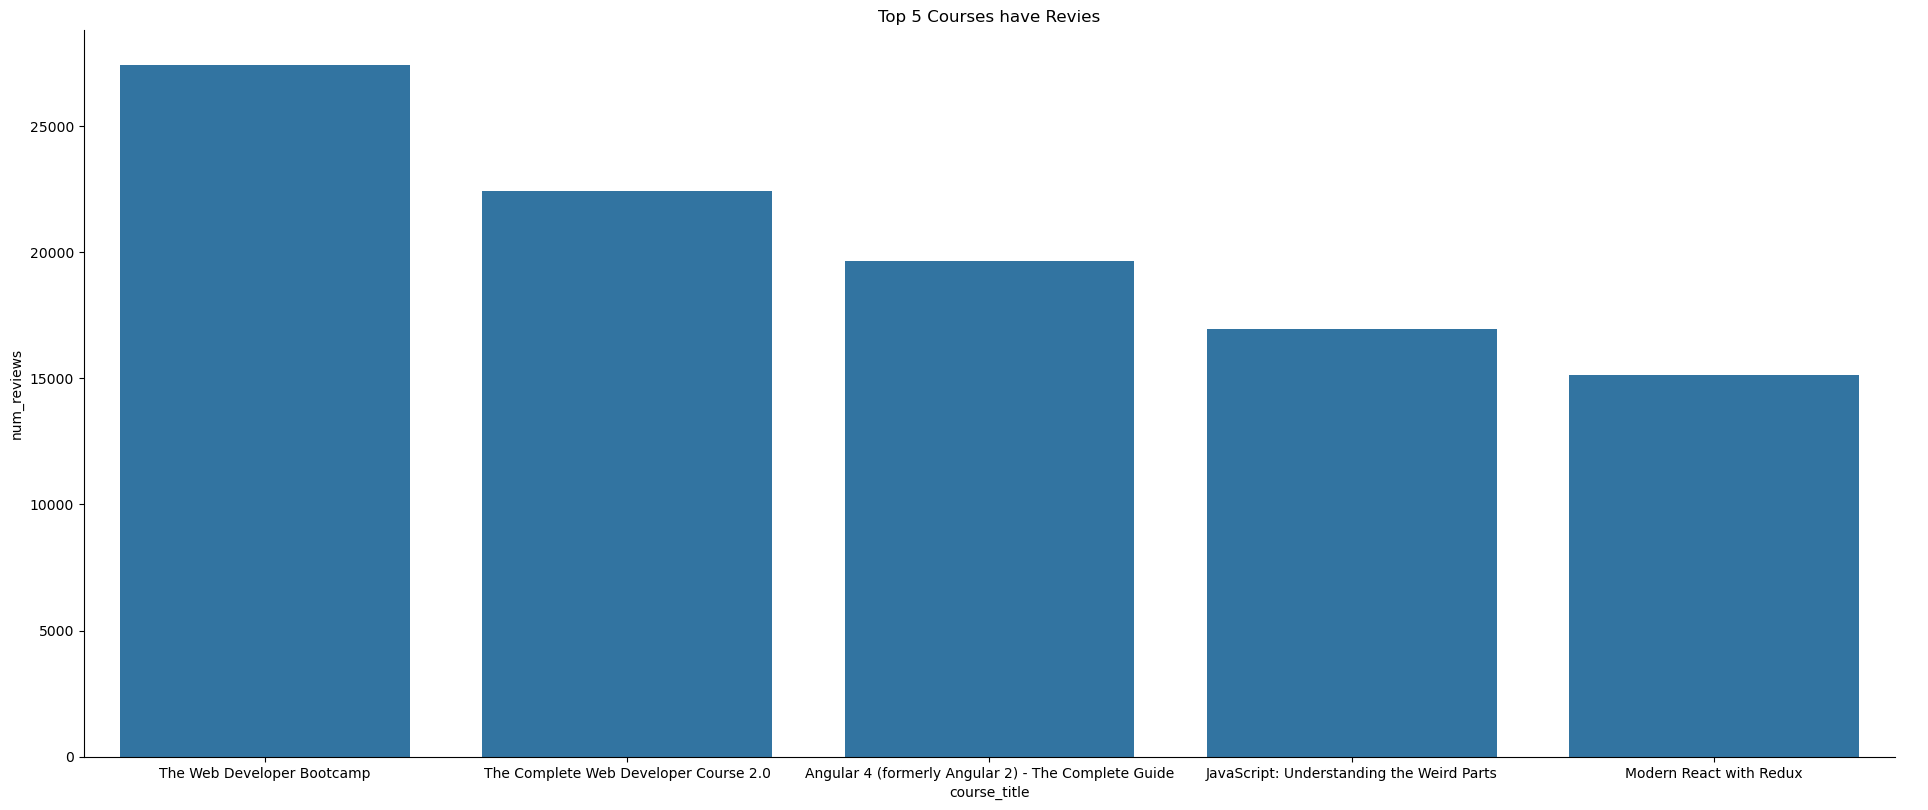

In [82]:
top_courses = df.sort_values(by='num_reviews', ascending=False).head(5)
sns.catplot(data = top_courses, kind = 'bar', x='course_title', y='num_reviews', aspect = 2.4, height = 8)
plt.title("Top 5 Courses have Revies")
plt.show()